# Hypothesis Testing:

**Hypothesis testing in statistics is a way for you to test the results of a survey or experiment to see if you have meaningful results.**


In [46]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
# t_score for sampling distributions
def t_score(sample_size, sample_mean, pop_mean, sample_std):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / sample_size**0.5
    return numerator / denomenator


# Problems:
**Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? ~~(Given that the population std is 50)~~**

Step - 1:
Alternate Hypothesis (Bold claim):

$$ H_1: \mu \neq 500 $$

Null Hypothesis (Status Quo):

$$ H_0: \mu = 500 $$

Step - 2:

Collect a sample of size n = 10

$$[490, 220, 470, 500, 495, 496, 496, 498, 508, 480]$$

Compute sample mean

$$\bar{x} = 465.3 $$

$$ S = 82.3918078451978 $$

 Step - 3: 

Compute Test Statistic:

$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} = -1.3318197242863192 $$
 
 Step - 4:

Decide $ \alpha $ or significance level

$$confidence level = 0.95$$

$$\alpha = 1 - confidence level  $$

$$ \alpha = 0.5 $$

$$ t_critical = t_{n-1,\frac{\alpha}{2}} = 2.093024054408263 $$


 Step - 5: two tailed t-test:

$$ \ Reject \ H_0 \ if : |t| \gt t_{n-1,\frac{\alpha}{2}}  $$



In [22]:
l = [490, 220, 470, 500, 495, 496, 496, 498, 508, 480]

sample_mean = sum(l)/len(l)

print(sample_mean)

465.3


In [23]:
#sample standard deviation:
np.std(l)


82.3918078451978

In [37]:
# Two Tail - Calculating the t-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = t.ppf(1-alpha/2, df = 9)

print(t_critical)

2.2621571627409915


In [38]:
# Defining the sample and population parameters

sample_size = 10
sample_mean = 465.3
pop_mean = 500
sample_std = 82.3918078451978

In [39]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t)

-1.3318197242863192


Text(465.3, 0.0007, 'x_bar')

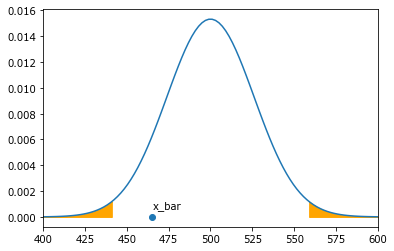

In [40]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

In [41]:
# Conclusion using t test
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


**Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? ~~(Given that the population std is 0.5)~~**

Step - 1:
Alternate Hypothesis (Bold claim):

$$ H_1: \mu > 4 $$

Null Hypothesis (Status Quo):

$$ H_0: \mu \leq 4 $$

Step - 2:

Collect a sample of size n = 10

$$ [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5] $$

Compute sample mean

$$\bar{x} = 4.25 $$

compute sample standard deviation :

$$ S =  0.82915619758885$$

 Step - 3: 

Compute Test Statistic:

$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$
 
 Step - 4:

Decide $ \alpha $ or significance level

$$confidence level = 0.95$$

$$\alpha = 1 - confidence level  $$

$$ \alpha = 0.5 $$

$$ t_critical = t_{n-1,\frac{\alpha}{2}} = 1.729132811521367 $$

 Step - 5:  tailed z-test:

$$ \ Reject \ H_0 \ if : t \gt t_{n-1,\frac{\alpha}{2}}  $$



In [57]:
l = [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]
print(np.mean(l))

4.25


In [58]:
#sample standard deviation:
print(np.std(l))


0.82915619758885


In [59]:
# one Tail - Calculating the t-critical value

confidence_level = 0.95

alpha = 1 - confidence_level

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


In [60]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = 4.25
pop_mean = 4
sample_std = 0.82915619758885

Text(4.25, 0.1, 'x_bar')

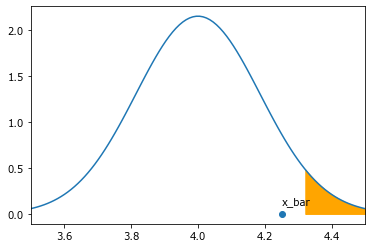

In [62]:
x_min = 3.5
x_max = 4.5

mean = pop_mean
std = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the acceptance region
# i.e. Fail to Reject the Null Hypothesis

In [88]:
# Conclusion using t test
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


**Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? ~~(Given that the population std is 1)~~**

Step - 1:
Alternate Hypothesis (Bold claim):

$$ H_1: \mu > 15 $$

Null Hypothesis (Status Quo):

$$ H_0: \mu \leq 15 $$

Step - 2:

Collect a sample of size n = 10

$$ [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] $$

Compute sample mean

$$\bar{x} = 15.099 $$

compute sample standard deviation

$$ S = 0.9994043225842081 $$

 Step - 3: 

Compute Test Statistic:

$$confidence level = 0.95$$

$$\alpha = 1 - confidence level  $$

$$ \alpha = 0.5 $$

$$ t_critical = t_{n-1,\frac{\alpha}{2}} = 1.729132811521367 $$

 Step - 5:  tailed z-test:

$$ \ Reject \ H_0 \ if : t \gt t_{n-1,\frac{\alpha}{2}}  $$



In [81]:
l = [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]
print(np.mean(l))

15.099


In [82]:
#sample standard deviation:
print(np.std(l))


0.9994043225842081


In [84]:
# One tail

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


In [85]:
# Defining the sample and population parameters

sample_size = 20
sample_mean = 15.1
pop_mean = 15
sample_std = 0.9994043225842081

In [86]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t)

0.44748014931892083


Text(15.1, 0.1, 'x_bar')

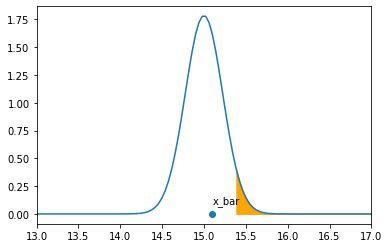

In [89]:
x_min = 13
x_max = 17

mean = pop_mean
std = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_right = pop_mean + (t_critical * std)

x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

# In this case sample mean falls in the acceptance region
# i.e. Fail to Reject the Null Hypothesis

In [90]:
# Conclusion using t test
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


**Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? ~~(Based on past data you know that the std is 10 ms)~~**
Step - 1:
Alternate Hypothesis (Bold claim):

$$ H_1: \mu < 100 $$

Null Hypothesis (Status Quo):

$$ H_0: \mu \geq 100 $$

Step - 2:

Collect a sample of size  n = 100

Compute sample mean

$$\bar{x} = 9.75 $$

compute sample standard deviation

$$ S = $$

 Step - 3: 

Compute Test Statistic:

$$confidence level = 0.95$$

$$\alpha = 1 - confidence level  $$

$$ \alpha = 0.5 $$

$$ t_critical = t_{n-1,\frac{\alpha}{2}} = 1.729132811521367 $$

 Step - 5:  tailed z-test:

$$ \ Reject \ H_0 \ if : t \lt t_{n-1,\frac{\alpha}{2}}  $$



In [66]:
# One tail

alpha = 1 - 0.95

t_critical = t.ppf(1-alpha, df = 19)

print(t_critical)

1.729132811521367


In [67]:
# Defining the sample and population parameters

sample_size = 100
sample_mean = 97.5
sample_std = 7
pop_mean = 100

In [68]:
t = t_score(sample_size, sample_mean, pop_mean, sample_std)
print(t)

-3.5714285714285716


Text(97.5, 0.02, 'x_bar')

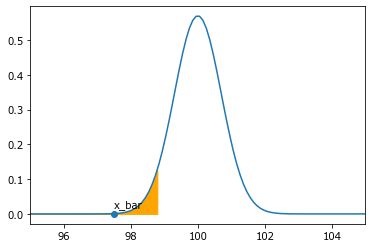

In [69]:
x_min = 95
x_max = 105

mean = pop_mean
std = sample_std / (sample_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

# In this case sample mean falls in the rejection region

# i.e. Reject Null Hypothesis

In [16]:
if(t < -t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis
